# Agrupamento com k-means

- é basicamente um algoritmo nao supervisionado usado para encontrar grupos dentro de uma base de dados
- segmentação de mercado
- agrupameno de noticias
- perfis de clientes(sugestão de filmes da netflix)
- aprendizagem não supervisionada -> nao tera um supervisor para falar a qual classe uma tupla pertence


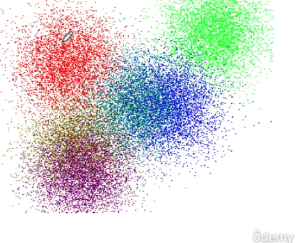

- elementos dentro de um grupo devem ser similares e diferentes dos elementos que estao fora do grupo
- nao tem rotulo e o algoritmo aprende as relações entre os dados


```
Lloyd(k-means)

1. inicializar os centroides aleatoriamente(centro de um cluster)
2. Para CADA PONTO de base de dados, calcular a distancia para CADA CENTROIDE e associar ao que estiver mais perto
3. Para cada centroide, Calcular a media de todos os pontos ligados e colocar o centroide la
4. repetir 2 e 3
```



## Calculo da distancia


Sendo X um regristo e Y um centroide, aplicamos essa formula para cada uma das colunas numericas, e assim teremos a distancia de um registro X a um centroide Y

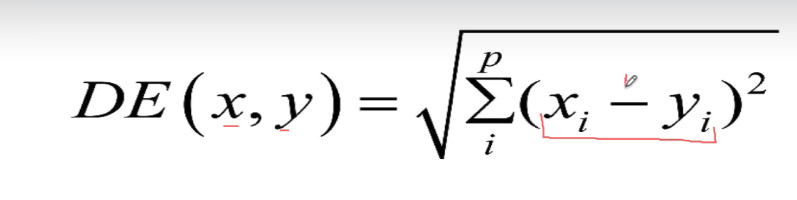

## Inicialização

- no k-means é aleatoria
- k-means++: Reduz a probabilidade de fazer inicializações ruins


```
Seleciona os centroides iniciais que estao longes uns dos outros

o primeiro é selecionado RANDOMICAMENTE, porem os outros são selecionados baseado na distancia para o primeiro ponto, para nao termos dois centroides muito perto de outro
```





**Definição do numero de clusters**

- Ter um conhecimento previo de quantos grupos sao necessarios
- se nao:

Sendo N o numero de registros:
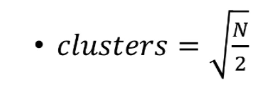

- tambem temos o Elbow method: Tenta varios valores de K e escolhe o melhor

- nao existe garantia para encontrar o melhor numero de clusters, temos que ir testando e achar o melhor para o projeto em questao

- para cada iteração do Elbow method, ele calcula o WCSS, que vamos usar para escolher o melhor numero de Cluster, para nao se adaptar demais e nem de menos

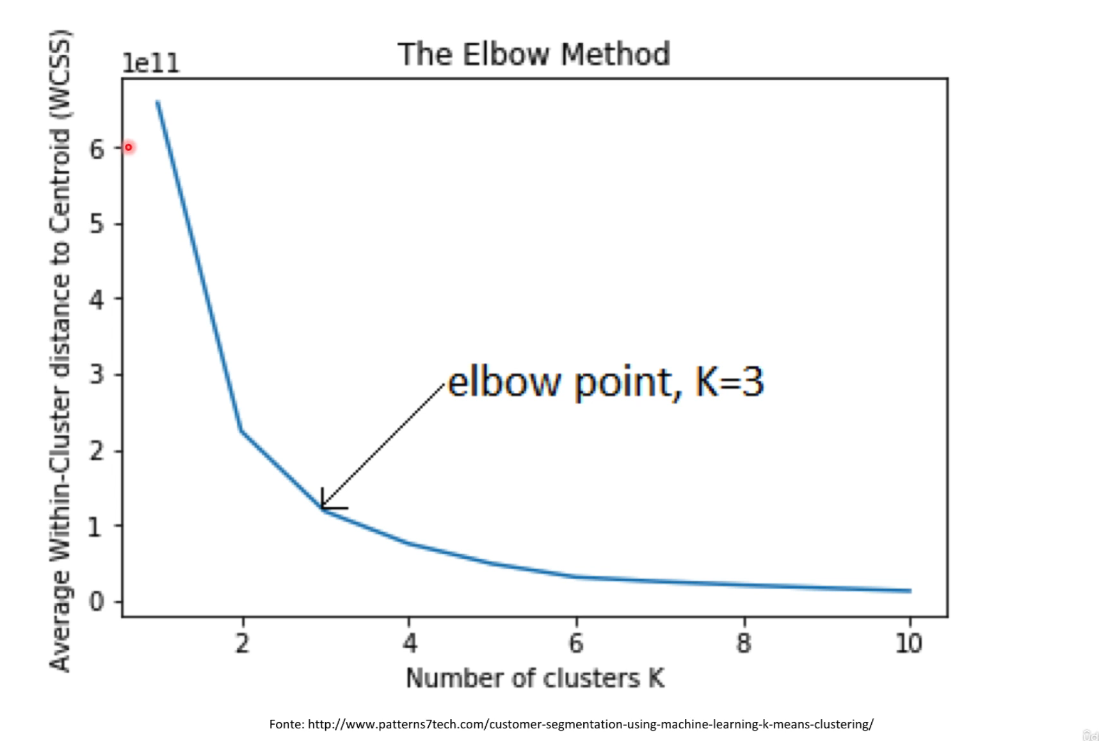

- Pegamos o ponto onde percebemos que a curva não é mais tao ascentuada, ou seja, a variação nao é tao grande

# Implementação K-means


## Base salario idade

In [2]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [3]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Idade e salario

x=[20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]
y= [1000, 1200, 2900, 1850, 900,950, 2000,2160, 3000,5900, 4100,5100, 7000, 5000,6500]



In [7]:
grafico = px.scatter(x=x, y=y)
grafico.show()

In [10]:
# Queremos gerar grupos baseados no grafico acima
base_salario = np.array([[20, 1000], [21,1200] , [21,2900] , [37,1850] , [46,900],
[53,950] , [55,2000] , [47,2100] , [52,3000], [32,5900] ,
[39,4100] , [41,5100] , [39, 7000] , [48, 5000] , [48,6500] ])
base_salario


array([[  20, 1000],
       [  21, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [12]:
# POr conta dos muitos calculos que fazemos na execução desse algoritmo, temos que padronizar os dados
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)
base_salario

array([[-1.74874734, -1.11413572],
       [-1.66101754, -1.01725435],
       [-1.66101754, -0.19376273],
       [-0.25734075, -0.70238991],
       [ 0.53222745, -1.1625764 ],
       [ 1.14633605, -1.13835606],
       [ 1.32179565, -0.62972888],
       [ 0.61995725, -0.5812882 ],
       [ 1.05860625, -0.14532205],
       [-0.69598974,  1.25945777],
       [-0.08188115,  0.38752547],
       [ 0.09357845,  0.8719323 ],
       [-0.08188115,  1.79230528],
       [ 0.70768705,  0.82349162],
       [ 0.70768705,  1.55010187]])

In [13]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [22]:
centroides = kmeans_salario.cluster_centers_
centroides # Esses valores tambem são padronizados, uma vez que sao a media dos registros dentro do cluster em questao

array([[ 0.10820009,  1.11413572],
       [ 0.73693032, -0.72661025],
       [-1.69026081, -0.77505093]])

In [23]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_) # Agora estamos com o valor correto

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  20.66666667, 1700.        ]])

In [20]:
# Rotulos diz a respeito a definir a qual grupo cada registro pertence
rotulos = kmeans_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1], color=rotulos)
grafico_2 = px.scatter(x=centroides[:, 0], y=centroides[:, 1], size  = [12,12,12]) #É o grafico que so mostra onde estão os centroides
grafico_3 = go.Figure(data = grafico.data + grafico_2.data)
grafico_3.show()

## Dados aleatorios

In [44]:
from sklearn.datasets import make_blobs

In [58]:
X_random, y_random = make_blobs(n_samples=200, centers = 5, random_state=1) # quantos cluster queremo nos dados aleatorios

In [46]:
X_random

array([[-1.96576392e+00,  5.23446451e+00],
       [-5.16022348e+00, -7.04217141e+00],
       [-6.17937069e+00, -2.16733539e+00],
       [-7.39138168e+00, -9.49590389e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-6.26144310e+00, -3.78347905e+00],
       [-2.04278768e+00,  3.07660864e-01],
       [-4.46426086e+00, -4.39451238e+00],
       [-6.40386190e+00, -6.36106990e+00],
       [ 2.42271161e-04,  5.14853403e+00],
       [-5.99212006e+00, -3.91488289e+00],
       [-6.46137477e+00, -3.14560994e+00],
       [-4.10185174e+00, -1.16625450e+00],
       [-1.01341572e+01, -4.07240274e+00],
       [-5.99004766e+00, -2.82631801e+00],
       [-1.14663009e+00,  4.10839703e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-9.19585147e+00, -3.90678125e+00],
       [-8.30173556e+00, -7.27738918e+00],
       [-7.56309575e+00, -8.46421308e+00],
       [-1.86845414e+00,  4.99311306e+00],
       [-4.22362233e+00, -2.50312346e+00],
       [-1.90838667e+00,  5.86113655e-01],
       [-6.

In [47]:
y_random # é o grupo a qual cada registro pertence

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

In [59]:
grafico = px.scatter(x = X_random[:, 0], y = X_random[:, 1])
grafico.show()

In [60]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [61]:
rotulos = kmeans_salario.predict(X_random)
rotulos # Vai armazenar a qual grupo pertence cada registro(y_random)

array([1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2,
       1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1,
       0, 2], dtype=int32)

In [62]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-2.17069756,  1.02591979],
       [-9.85620522, -3.91021738],
       [-5.90368078, -3.04489641],
       [-6.87958999, -8.11648104],
       [-1.58338528,  4.50520457]])

In [63]:
grafico1 = px.scatter(x = X_random[:, 0], y = X_random[:, 1], color = rotulos)
grafico2 = px.scatter(x = centroides[:, 0], y = centroides[:, 1], size=[5,5,5,5,5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

## Base cartao de credito

In [65]:
import pandas as pd
# Essa base de dados tem como objetivo prever se uma pessoa vai pagar  cartao de credito ou nao, faremos grupos nessa base
base_cartao = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/credit_card_clients.csv', header=1)
base_cartao.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- payN é pinformação sobre o pagamento da fatura de cartao de credito nos ultimos 6 meses
- bill_amtN é a fatura do cartao nos ultimos meses
- pay_amtN é quanto ele pagou no mes em questao
- default payment - se o cliente vai pagar ou nao a proxima fatura

In [66]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5']
base_cartao.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,13816
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,86104
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,201787
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,90208


In [67]:
# Vamos pegar apenas a coluna de limite e BILL total
X_cartao = base_cartao.iloc[:, [1,25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  13816],
       [ 90000,  86104],
       ...,
       [ 30000,  51139],
       [ 80000, 217667],
       [ 50000, 215561]])

In [70]:
# Temos que escalonar os dados por conta das contas de distancia
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)
X_cartao

array([[-1.13672015, -0.68703183],
       [-0.3659805 , -0.66822573],
       [-0.59720239, -0.44580167],
       ...,
       [-1.05964618, -0.55338602],
       [-0.67427636, -0.04099347],
       [-0.90549825, -0.04747345]])

In [72]:
# Vamos aplicar a tecnica do cotovelo
wcss = [] # Primeiramente temos que calcular os wcss para por no grafico
for i in range(1, 11): # Vamos fazer testes p 10 clustes
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [73]:
wcss

[59999.99999999996,
 35253.425817304436,
 20099.27523862585,
 14902.51711565496,
 10677.713943214663,
 8559.235511358918,
 7358.380279163397,
 6318.198235696,
 5655.0663525224645,
 5019.862019146394]

In [74]:
grafico = px.line(x=range(1,11), y = wcss)
grafico.show()

In [75]:
# criando algoritmo final
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao) # treina e faz ao mesmo tempo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [77]:
grafico = px.scatter(x = X_cartao[:, 0], y = X_cartao[:, 1], color = rotulos)
grafico.show()

Criamos grupos para o banco analisar os perfis de usuarios, com base no limite do cartao  e os gastos que efetuam


```
Temos 4 grupos
1. grupo com alto limite e puco gasto
2. grupo com baixo limite e muito gasto
3. grupo com alto limite e limite alto
4. grupo com baixo limite e baixo gasto
```

Com isso, podemos extrair insights sobre quais grupos sao destinados para ex: aumento de limite, abaixar o limte, etc, ...



In [78]:
# Lista de clientes de cada rotulo
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      1],
       [     2, 120000,      2, ...,      1,  13816,      1],
       [     3,  90000,      2, ...,      0,  86104,      1],
       ...,
       [ 29998,  30000,      1, ...,      1,  51139,      1],
       [ 29999,  80000,      1, ...,      1, 217667,      1],
       [ 30000,  50000,      1, ...,      1, 215561,      1]])

In [80]:
# agrupando por grupo
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]
lista_clientes

array([[  27195,  470000,       1, ...,       0,  795399,       0],
       [  19459,  380000,       2, ...,       0, 1323902,       0],
       [  24740,  240000,       1, ...,       0, 1089441,       0],
       ...,
       [  28753,  180000,       2, ...,       0,  524700,       3],
       [  17071,  250000,       2, ...,       0,  617029,       3],
       [  11354,  310000,       2, ...,       0,  524347,       3]])

## Base de dados cartão de credito - mais atributos


In [83]:
# Pegando mais atributos da base de dados
X_cartao_mais = base_cartao.iloc[:, [1,2,3,4,5,25]].values
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  13816],
       [ 90000,      2,      2,      2,     34,  86104],
       ...,
       [ 30000,      1,      2,      2,     37,  51139],
       [ 80000,      1,      3,      1,     41, 217667],
       [ 50000,      1,      2,      1,     46, 215561]])

In [85]:
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

In [86]:
# Padronizando
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao_mais.fit_transform(X_cartao_mais)
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.68703183],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66822573],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44580167],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.55338602],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.04099347],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.04747345]])

In [87]:
# Regra do cotovelo
wcss = [] # Primeiramente temos que calcular os wcss para por no grafico
for i in range(1, 11): # Vamos fazer testes p 10 clustes
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [88]:
grafico = px.line(x=range(1,11), y = wcss)
grafico.show()

In [98]:
kmeans_cartao_mais = KMeans(n_clusters=3, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [99]:
rotulos

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)

In [100]:
# Para fazer o graficos, vamos aplicar tecnica PCA, que é utilizada para redução de dimencionalidade
# Vamos combinar os 6 atributos do X_cartao_mais em apenas 2, para caber no grafico
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [102]:
X_cartao_mais_pca # Agora temos so duas colunas

array([[-0.73662246, -1.13943041],
       [-1.480228  , -0.30825621],
       [-0.94662614, -0.49268192],
       ...,
       [-0.79816121, -0.91478544],
       [ 1.17364529, -1.55915051],
       [ 1.15591676, -1.10789085]])

In [103]:
grafico = px.scatter(x = X_cartao_mais_pca[:, 0], y = X_cartao_mais_pca[:, 1], color = rotulos)
grafico.show()

In [104]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]
lista_clientes

array([[  15000,   50000,       1, ...,       0,  205848,       0],
       [  11710,  160000,       2, ...,       0,   20277,       0],
       [  11711,  140000,       2, ...,       0,   52399,       0],
       ...,
       [  21473,  500000,       2, ...,       0, 1016919,       2],
       [   6165,  390000,       2, ...,       0, 1441198,       2],
       [  24482,  220000,       1, ...,       1,  862990,       2]])